# Lecture 2 notebook

In this notebook we will cover:
- Regular Expression
- Vectorization
- Twitter example

## Regular Expression:
A sequence of characters that define a search pattern:
- Find operation
- Find and replace operation
- Find and split operation

Example of split operation:
This example split the input separted by one or multiple special characters ("  \n()-."):

In [197]:
text ='''TEAM NEWS: Here's how Newcastle United will line up 
at @ManCity in the @premierleague this afternoon 
(kick-off 5:30pm GMT). #NUFC https://www.nufc.co.uk/'''

import re
print(re.split("[ \n()-.]+", text))


['TEAM', 'NEWS:', "Here's", 'how', 'Newcastle', 'United', 'will', 'line', 'up', 'at', '@ManCity', 'in', 'the', '@premierleague', 'this', 'afternoon', 'kick', 'off', '5:30pm', 'GMT', '#NUFC', 'https://www', 'nufc', 'co', 'uk/']


## Tokenization example:

In [70]:
#select tokens of 1 or more alphanumeric 
print(re.findall("\w+", text))

['TEAM', 'NEWS', 'Here', 's', 'how', 'Newcastle', 'United', 'will', 'line', 'up', 'at', 'ManCity', 'in', 'the', 'premierleague', 'this', 'afternoon', 'kick', 'off', '5', '30pm', 'GMT', 'NUFC', 'https', 'www', 'nufc', 'co', 'uk']


In [71]:
#select tokens of 2 or more alphanumeric 
print(re.findall('\w\w+', text))


['TEAM', 'NEWS', 'Here', 'how', 'Newcastle', 'United', 'will', 'line', 'up', 'at', 'ManCity', 'in', 'the', 'premierleague', 'this', 'afternoon', 'kick', 'off', '30pm', 'GMT', 'NUFC', 'https', 'www', 'nufc', 'co', 'uk']


## Recognizing URLs

In [82]:
re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)

['https://www.nufc.co.uk/']

## Recognizing hashtags (or mentions)

In [170]:
#Hashtag:
print(re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))(#)([A-Za-z]+[A-Za-z0-9]+)', text))

#Mention
print(re.findall('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)', text))

[('#', 'NUFC')]
['ManCity', 'premierleague']


## Applying multiple regexp:
- Changing URLs to 'url'
- Chaning hashtag sign (#) to 'hashtag_'
- Removing mentions
- Tokenization

In [198]:
regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

regexp_token = '\w\w+'
pattern_token = re.compile(regexp_token, re.UNICODE | re.IGNORECASE)

#Changing URLs to 'url'
temp = pattern_url.sub('url', text.lower())

#Chaning hashtag sign (#) to 'hashtag_'
temp = pattern_hashtag.sub(r'hashtag_\1', temp)

#Removing mentions
temp = pattern_mention.sub('', temp)

tokens = pattern_token.findall(temp)
#Tokenization
print(tokens)


['team', 'news', 'here', 'how', 'newcastle', 'united', 'will', 'line', 'up', 'at', 'in', 'the', 'this', 'afternoon', 'kick', 'off', '30pm', 'gmt', 'hashtag_nufc', 'url']


---

# Sparse Matrix

## Lists of lists (LIL)
Good for incremental matrix construction


In [12]:
from scipy.sparse import lil_matrix, csr_matrix, csc_matrix, rand

X = [[3, 0, 0, 3], [0, 2, 1, 0], [0, 1, 0, 0]]

lil = lil_matrix(X)
print(lil.rows)
print(lil.data)
print(lil)

[list([0, 3]) list([1, 2]) list([1])]
[list([3, 3]) list([2, 1]) list([1])]
  (0, 0)	3
  (0, 3)	3
  (1, 1)	2
  (1, 2)	1
  (2, 1)	1


In [9]:
X = [[0, 2, 0, 3], [0, 2, 0, 0], [1, 0, 5, 0]]
lil = lil_matrix(X)
print(lil.data)
print(lil.rows)


[list([2, 3]) list([2]) list([1, 5])]
[list([1, 3]) list([1]) list([0, 2])]


## Compressed Sparse Row (CSR)
Good for row operations

In [3]:
csr = csr_matrix(X)
print(csr.indptr)
print(csr.indices)
print(csr.data)

[0 2 4 5]
[0 3 1 2 1]
[3 3 2 1 1]


## Compressed Sparse Column (CSC)

Good for column operations

In [278]:
csc = csc_matrix(X)
print(csc.indptr)
print(csc.indices)
print(csc.data)

[0 1 3 4 5]
[0 1 2 1 0]
[3 2 1 1 3]


In [10]:
X = [[0, 2, 0, 3], [0, 2, 0, 0], [1, 0, 5, 0]]
csc = csc_matrix(X)
print(csc.indptr)
print(csc.indices)
print(csc.data)

[0 1 3 4 5]
[2 0 1 2 0]
[1 2 2 5 3]


In [14]:
X = rand(10000, 1000, format = 'csr')
Y = rand(1000, 2000, format = 'csr')

%time X.dot(Y)

Wall time: 32.3 ms


<10000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1903891 stored elements in Compressed Sparse Row format>

In [335]:
X_dense = X.toarray()
Y_dense = Y.toarray()
%time X_dense.dot(Y_dense)

Wall time: 604 ms


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.1526738 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.02730159,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [337]:
X[10, 3] = 100

C:\WinPython-64bit-3.4.4.4Qt5\python-3.4.4.amd64\lib\site-packages\scipy\sparse\compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


---

## Vectorization

Binary Vectorization:

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

Data = ["Shipment of gold damaged in a fire", 
        "Delivery of silver arrived in a silver truck", 
        "Shipment of gold arrived in a truck"]


Binary = CountVectorizer(binary = True)   # gives the class
X = Binary.fit_transform(Data)       # fit means data should be fitted into the model and immediatly transform
print(X.toarray())

[[0 1 0 1 1 1 1 1 0 0]
 [1 0 1 0 0 1 1 0 1 1]
 [1 0 0 0 1 1 1 1 0 1]]


In [7]:
Binary.get_feature_names()
Binary.vocabulary_

{'arrived': 0,
 'damaged': 1,
 'delivery': 2,
 'fire': 3,
 'gold': 4,
 'in': 5,
 'of': 6,
 'shipment': 7,
 'silver': 8,
 'truck': 9}

In [3]:
# optional to above
Binary = CountVectorizer(binary = True)   # gives the class
Binary.fit(Data) 
Binary = CountVectorizer(binary = True)   # gives the class
X = Binary.transform(Data)  

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [6]:
Binary.get_feature_names()
Binary.vocabulary_

{'arrived': 0,
 'damaged': 1,
 'delivery': 2,
 'fire': 3,
 'gold': 4,
 'in': 5,
 'of': 6,
 'shipment': 7,
 'silver': 8,
 'truck': 9}

Count Vecotirzation:

In [347]:
Count = CountVectorizer()
X = Count.fit_transform(Data)
print(X.toarray())

[[0 1 0 1 1 1 1 1 0 0]
 [1 0 1 0 0 1 1 0 2 1]
 [1 0 0 0 1 1 1 1 0 1]]


TF-IDF Vectorization:

In [348]:
TfIdf = TfidfVectorizer(norm = None) # by default it uses L2 normalization
X = TfIdf.fit_transform(Data)
print(X.todense())

[[ 0.          1.69314718  0.          1.69314718  1.28768207  1.          1.
   1.28768207  0.          0.        ]
 [ 1.28768207  0.          1.69314718  0.          0.          1.          1.
   0.          3.38629436  1.28768207]
 [ 1.28768207  0.          0.          0.          1.28768207  1.          1.
   1.28768207  0.          1.28768207]]


---

# Vectorization example

Loading 20 Newsgroups database:

https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups


In [9]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train')
print(newsgroups_train.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Loading only some newsgroups:

In [10]:
cats = ['sci.space', 'talk.politics.mideast', 'comp.graphics']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'), shuffle = False)
data = newsgroups_train.data
print(len(data))

print(newsgroups_train.target_names)

1741
['comp.graphics', 'sci.space', 'talk.politics.mideast']


Vectorizing with binary vectorization, ignoring terms that are appears in less than 20 documents, and ignoring stop words:

In [80]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import numpy as np

count = CountVectorizer(binary = True, min_df = 20, stop_words='english')

X = count.fit_transform(data)
print(X.shape)

(1741, 1436)


# or

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import numpy as np

count = CountVectorizer(binary = True, min_df = 20, stop_words='english',ngram_range=(1,3))

X = count.fit_transform(data)
print(X.shape)
X.toarray()

(1741, 1475)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
count.get_feature_names()
count.vocabulary_

{'don': 408,
 'like': 753,
 'comment': 288,
 'typical': 1373,
 'thinking': 1336,
 'state': 1263,
 'read': 1079,
 'lot': 780,
 'killing': 704,
 'author': 171,
 'religious': 1112,
 'colors': 282,
 'history': 627,
 'seen': 1181,
 'people': 970,
 'land': 717,
 'think': 1335,
 'great': 582,
 'book': 206,
 'arabs': 135,
 'turks': 1367,
 'result': 1134,
 'efforts': 439,
 'reading': 1081,
 'group': 589,
 'writing': 1464,
 'making': 797,
 'phone': 981,
 'calls': 229,
 'following': 523,
 'happened': 599,
 'nasa': 873,
 'funds': 549,
 'alive': 104,
 '1991': 27,
 'kill': 702,
 'dc': 354,
 'june': 696,
 'year': 1468,
 'kept': 700,
 'job': 690,
 'heavy': 614,
 'mark': 804,
 'shows': 1204,
 'readers': 1080,
 'sci': 1169,
 'space': 1240,
 'power': 1017,
 'allen': 105,
 'sci space': 1170,
 'fairly': 489,
 'scale': 1167,
 'movie': 861,
 '11': 7,
 'minutes': 843,
 '13': 9,
 'video': 1408,
 'little': 759,
 'bad': 182,
 'second': 1177,
 'saw': 1163,
 'bit': 198,
 'color': 281,
 'consider': 310,
 'thing': 1

Reporting top frequent words per newsgroup:

In [12]:
#Loading vocabulary:
vocab = np.array(count.get_feature_names())

for i in range(len(newsgroups_train.target_names)):
    #Select only target newsgroup:
    target = newsgroups_train.target == i
    freq = X[target].sum(0).A1 # A1 changes matrix to numpy array
    order = freq.argsort()[::-1]
    print("%s: %s" % (newsgroups_train.target_names[i], ', '.join(vocab[order[:10]])))


comp.graphics: thanks, graphics, know, like, use, does, need, program, don, just
sci.space: space, like, just, don, think, know, nasa, time, use, earth
talk.politics.mideast: people, like, just, israel, israeli, don, time, know, think, jews


In [13]:
print(newsgroups_train.target_names)
print(newsgroups_train.target)
subset=newsgroups_train.target==0
A=X[subset]
print(subset)

['comp.graphics', 'sci.space', 'talk.politics.mideast']
[2 1 0 ..., 0 2 0]
[False False  True ...,  True False  True]


Verifying Zipf's law:

$f_i \propto i^{-b}$

$\log f_i = K - b\log i$

$f_i = \exp (K - b\log i)$

K = 4.536241
b = 0.001238


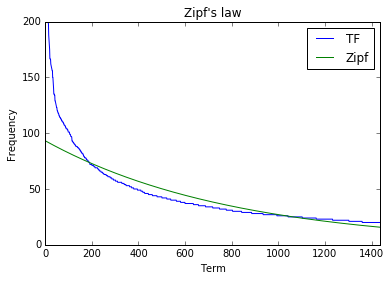

In [82]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

#Compute frequency
freq = np.sort(X.sum(0).A1)[::-1]

#Fit a linear regression to estimate K and b
reg = LinearRegression()
term_numbers = np.arange(1, len(freq) + 1).reshape(-1, 1)
reg.fit(term_numbers, np.log(freq))
pred = np.exp(reg.predict(term_numbers))

print("K = %f" % reg.intercept_)
print("b = %f" % -reg.coef_[0])

#Create the plot
plt.title("Zipf's law")
plt.plot(freq, label = 'TF')
plt.plot(pred, label = 'Zipf')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.xlim(0, len(freq))
plt.ylim(0, 200)
plt.legend(loc = 'upper right')
plt.show()

## Create a scatter plot for different newsgroups

Since documents have a higher dimensionality, to make a scatter plot, we need to reduce the dimension to 2D. Therefore, we use LSA (SVD) to reduce the dimension:

Dimension (1741, 3055) -> (1741, 2)


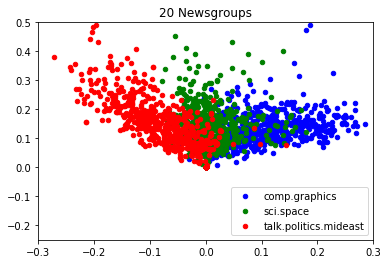

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from  sklearn.decomposition import TruncatedSVD

#Using TF-IDF vectorization:
vect = TfidfVectorizer(binary = True, min_df = 10, stop_words='english')
X = vect.fit_transform(data)

#Reduce dimension
lsa = TruncatedSVD(2)
X_2d = lsa.fit_transform(X)

print("Dimension %s -> %s" % (X.shape, X_2d.shape))

colors = 'bgry'

for i in range(len(newsgroups_train.target_names)):
    target = newsgroups_train.target == i
    plt.scatter(X_2d[target, 1], X_2d[target, 0], 20, c = colors[i], label = newsgroups_train.target_names[i])

plt.title('20 Newsgroups')
plt.xlim(-.3, .3)
plt.ylim(-.25, .5)
plt.legend(loc = 'lower right')
plt.show()

In [16]:
plt.scatter(X_2d[1,1], X_2d[target, 0],20

-0.035663260696820742

---

# Sentiment Analysis using lexicons (word lists)

List of terms with positive/negative/neutral sentiment:
- AFINN: http://neuro.imm.dtu.dk/wiki/AFINN

In [86]:
import numpy as np
from collections import defaultdict

#Load from the text data
Afinn_data = np.loadtxt('AFINN-111.txt', dtype = bytes, delimiter = '\t')

#Setting default sentiment to zero (neutral):
Afinn_sent = defaultdict(lambda: 0)

#Creating the dictionary:
Afinn_sent.update(dict(zip(Afinn_data[:, 0].astype('str'), Afinn_data[:, 1].astype('i4'))))

In [87]:
print(Afinn_sent['joy'])
print(Afinn_sent['anxious'])


3
-2


## Distribution of scores

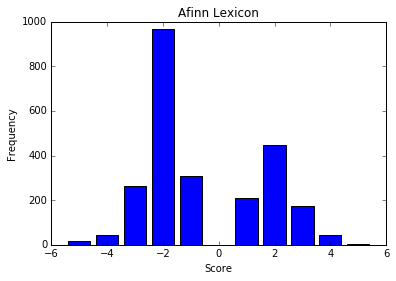

In [88]:
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

dist = Afinn_data[:, 1].astype('i4')
counter = Counter()
counter.update(dist)
scores = list(counter.keys())
freq = counter.values()

plt.bar(scores, freq, align = 'center')

plt.title('Afinn Lexicon')
plt.xlabel('Score')
plt.ylabel("Frequency")
plt.show()

In [94]:
import re

def sentiment(text, verbose = False):
    terms = re.findall('\w\w+', text.lower())
    scores = []
    for x in terms:
        if Afinn_sent[x] != 0:
            scores.append(Afinn_sent[x])
            if verbose:
                print("%s: %d" % (x, Afinn_sent[x]))

    if len(scores) == 0:
        return 0
    return sum(scores) / len(scores)


<img src="Capture1.PNG">

In [90]:
sentiment("Congrats to @KingJames of the @cavs on joining the exclusive 30,000 Career Points Club!", True)

congrats: 2
exclusive: 2


2.0

<img src="Capture2.PNG">

In [91]:
sentiment("A train conductor in Canada was fired over 'racy' railroad photos!", True)

fired: -2


-2.0

## Sentiment Analysis of 20 Newgroup

In [114]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
scores = [sentiment(x) for x in newsgroups_train.data]
order = np.argsort(scores)

In [121]:
for i in order[:3]:
    print(newsgroups_train.data[i])
    print(sentiment(newsgroups_train.data[i], True))
    print("-" * 80)

Watch your language ASSHOLE!!!!
asshole: -4
-4.0
--------------------------------------------------------------------------------
OK, I'm sure that this has been asked 100's of times before, but I
have wondered since I heard it...  Where the hell did the nickname
of the "Habs" come from for the Montreal Canadiens?
hell: -4
-4.0
--------------------------------------------------------------------------------

  Bobby:

  Get this the hell out of your .sig until you 1) learn what it
  stands for and 2) really mean it.

/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\ 

Bob Beauchaine bobbe@vice.ICO.TEK.COM 

They said that Queens could stay, they blew the Bronx away,
and sank Manhattan out at sea.
hell: -4
-4.0
--------------------------------------------------------------------------------


In [122]:
for i in order[-3:]:
    print(newsgroups_train.data[i])
    print(sentiment(newsgroups_train.data[i], True))
    print("-" * 80)

OK -- so we've got a hotly contested BMWOA election and some inept 
leadership.

My question is the history of the BMW organization that lead to the
formation of the BMWRA. Was there something going on in the OA years
ago that precipitated the formation of two competing owner's groups?

Just to stave off flames: I'm a (relatively new) member of both groups
and besides a difference in the slickness of the magazines, it seems
the major difference is that the RA guys seem to have more fun. . .

Art
fun: 4
4.0
--------------------------------------------------------------------------------


[much deleted]

amazing.  I could not find _one_ reference to waffle in all of this.

followups redirected out.
amazing: 4
4.0
--------------------------------------------------------------------------------

I thought it was 1) wins 2) goals for.
wins: 4
4.0
--------------------------------------------------------------------------------
